### Team ID   <font color=black>        : C7</font>
### Sem         : <font color=black> 5</font> 
### Div           : <font color=black> C</font>
### School: <font color=black>School Of Computer Science And Engineering </font> 
###   Topic ID   : <font color=black> 5DMACP08</font>
###    Project Title:  <font color=black>Building Insurance Claim Prediction</font>
###   Problem Statement: <font color=black>Predict if a building will have an insurance claim during a certain period. </font>   
###    Team Details :
###    Team Leader :
###  <font color=black>Nisha Rao         -146-    01FE17BCS123</font>
###    Members:
###  <font color=black>Prajwal Nazre     -154-    01FE17BCS131</font> 
### <font color=black>Pratiksha Danti    -162-    01FE17BCS139</font>
### <font color=black>Rachana Udagatti   -167-    01FE17BCS145</font>

### Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

### Input data

In [20]:
# Loading the train datasets
train_datax=pd.read_csv('x_train1.csv')
train_datax.drop('Index',axis=1,inplace=True)
train_datax.head()

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,IDENTICAL,V,based,2,1351.0,4,2012.0,0,2,65440
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,V,NOT,based,2,1972.0,2,1980.0,0,0,14341
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,V,NOT,based,2,1630.0,4,NaN,0,0,75109
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,V,NOT,based,2,532.0,3,NaN,0,0,92004
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,IDENTICAL,V,based,2,1050.0,2,1972.0,0,4,59340


### External Data

In [21]:
lat_long=pd.read_csv('latlong.csv')
lat_long

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,Insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Attignat,1340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Beaupont,1270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bény,1370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Béreyziat,1340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,1250,1245,46.133333,5.4,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,Outre-Mer,5,Mayotte,Mamoudzou,976,Mayotte,Mamoudzou,1,M'TSANGAMOUJI,97600,97613,NaN,NaN,NaN
36836,Outre-Mer,5,Mayotte,Mamoudzou,976,Mayotte,Mamoudzou,1,OUANGANI,97600,97614,NaN,NaN,NaN
36837,Outre-Mer,5,Mayotte,Mamoudzou,976,Mayotte,Mamoudzou,1,PAMANDZI,97610,97615,NaN,NaN,NaN
36838,Outre-Mer,5,Mayotte,Mamoudzou,976,Mayotte,Mamoudzou,1,SADA,97640,97616,NaN,NaN,NaN


In [22]:
train_datax=pd.concat((train_datax,lat_long), axis = 0, ignore_index = True)
train_datax.drop('EU_circo',axis=1,inplace=True)
train_datax.drop('chef.lieu_région',axis=1,inplace=True)
train_datax.drop('code_région',axis=1,inplace=True)
train_datax.drop('codes_postaux',axis=1,inplace=True)
train_datax.drop('nom_commune',axis=1,inplace=True)
train_datax.drop('nom_département',axis=1,inplace=True)
train_datax.drop('nom_région',axis=1,inplace=True)
train_datax.drop('numéro_circonscription',axis=1,inplace=True)
train_datax.drop('numéro_département',axis=1,inplace=True)
train_datax.drop('préfecture',axis=1,inplace=True)
train_datax.drop('éloignement',axis=1,inplace=True)
train_datax.head()

,EXPO,Insee,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,...,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,latitude,login,longitude,superficief
0,1.000000,65440,O,NOT,NOT,NOT,NOT,OTHER,IDENTICAL,V,...,0.0,V,NOT,1,O,1,NaN,18702.0,NaN,1351.0
1,1.000000,14341,V,V,V,V,V,V,V,NOT,...,0.0,V,V,V,V,V,NaN,3877.0,NaN,1972.0
2,1.000000,75109,V,V,V,V,V,V,V,NOT,...,1.0,V,V,V,V,V,NaN,4942.0,NaN,1630.0
3,0.246575,92004,V,V,V,V,V,V,V,NOT,...,0.0,NOT,V,V,V,V,NaN,13428.0,NaN,532.0
4,1.000000,59340,O,NOT,NOT,O,NOT,OTHER,IDENTICAL,V,...,0.0,V,NOT,2,O,1,NaN,17137.0,NaN,1050.0


In [7]:
train_datax.drop('Insee',axis=1,inplace=True)

In [8]:
train_datay=pd.read_csv('y_train.csv')
train_datay.drop('Index',axis=1,inplace=True)
train_datay.head()

,login,TARGET
0,18702,0
1,3877,1
2,4942,0
3,13428,0
4,17137,0


In [9]:
train_data=pd.merge(train_datax,train_datay)
train_data.tail(10)

,EXPO,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,...,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,latitude,login,longitude,superficief,TARGET
10219,0.997268,O,N,N,O,N,AUTRE,IDENTIQUE,V,base,...,V,N,2,O,1,NaN,18023.0,NaN,5555.0,0
10220,1.000000,O,N,O,O,N,AUTRE,IDENTIQUE,V,base,...,V,N,3,O,1,NaN,3965.0,NaN,2178.0,1
10221,1.000000,V,V,V,V,V,V,V,N,base,...,N,V,V,V,V,NaN,46.0,NaN,175.0,0
10222,1.000000,O,N,N,N,N,AUTRE,IDENTIQUE,V,pi,...,V,N,2,O,1,NaN,2526.0,NaN,625.0,0
10223,0.997268,O,N,N,N,N,AUTRE,IDENTIQUE,V,effpi,...,V,N,1,O,1,NaN,1605.0,NaN,2417.0,0
10224,1.000000,V,V,V,V,V,V,V,N,base,...,V,V,V,V,V,NaN,2710.0,NaN,550.0,0
10225,0.000000,O,N,N,O,N,AUTRE,IDENTIQUE,V,base,...,V,N,2,O,1,NaN,16868.0,NaN,5580.0,0
10226,0.246575,V,V,V,V,V,V,V,N,base,...,V,V,V,V,V,NaN,8499.0,NaN,750.0,0
10227,1.000000,V,V,V,V,V,V,V,N,base,...,N,V,V,V,V,NaN,5319.0,NaN,1754.0,0
10228,1.000000,O,N,O,N,N,AUTRE,IDENTIQUE,V,pi,...,V,N,1,O,1,NaN,8817.0,NaN,5400.0,1


In [10]:
train_data=train_data.drop_duplicates()
train_data.shape[0]

10229

In [11]:
train_data.columns

Index(['EXPO', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ', 'ft_19_categ', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'ft_2_categ', 'ft_4_categ', 'ft_5_categ',
       'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ', 'latitude',
       'login', 'longitude', 'superficief', 'TARGET'],
      dtype='object')

### Test Data

In [12]:
# Loading the test dataset
test_data=pd.read_csv('x_test1.csv')
test_data1=pd.read_csv('x_test1.csv')
test_data.drop('Index',axis=1,inplace=True)
test_data.head()

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,16872,2012,1.000000,1,V,NOT,1,O,1,O,...,IDENTICAL,V,effpi,2,2682.0,2,1970.0,0,4,78383
1,16852,2012,1.000000,1,V,NOT,1,O,1,O,...,IDENTICAL,V,based,2,2925.0,2,1960.0,0,6,78242
2,598,2014,1.000000,1,V,V,V,V,V,V,...,V,NOT,based,2,525.0,4,1960.0,0,0,75120
3,4516,2013,0.161644,0,NOT,V,V,V,V,V,...,V,NOT,based,2,443.0,2,1980.0,0,0,11901
4,7939,2013,1.000000,0,NOT,V,V,V,V,V,...,V,NOT,based,2,1070.0,1,NaN,0,0,42330


In [15]:
test_data=pd.concat((test_data,lat_long), axis = 0, ignore_index = True)
test_data.drop('EU_circo',axis=1,inplace=True)
test_data.drop('chef.lieu_région',axis=1,inplace=True)
test_data.drop('code_région',axis=1,inplace=True)
test_data.drop('codes_postaux',axis=1,inplace=True)
test_data.drop('nom_commune',axis=1,inplace=True)
test_data.drop('nom_département',axis=1,inplace=True)
test_data.drop('nom_région',axis=1,inplace=True)
test_data.drop('numéro_circonscription',axis=1,inplace=True)
test_data.drop('numéro_département',axis=1,inplace=True)
test_data.drop('préfecture',axis=1,inplace=True)
test_data.drop('éloignement',axis=1,inplace=True)
test_data.head()

,EXPO,Insee,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,...,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,latitude,login,longitude,superficief
0,1.000000,78383,O,NOT,NOT,O,NOT,OTHER,IDENTICAL,V,...,1.0,V,NOT,1,O,1,NaN,16872.0,NaN,2682.0
1,1.000000,78242,O,NOT,NOT,O,NOT,OTHER,IDENTICAL,V,...,1.0,V,NOT,1,O,1,NaN,16852.0,NaN,2925.0
2,1.000000,75120,V,V,V,V,V,V,V,NOT,...,1.0,V,V,V,V,V,NaN,598.0,NaN,525.0
3,0.161644,11901,V,V,V,V,V,V,V,NOT,...,0.0,NOT,V,V,V,V,NaN,4516.0,NaN,443.0
4,1.000000,42330,V,V,V,V,V,V,V,NOT,...,0.0,NOT,V,V,V,V,NaN,7939.0,NaN,1070.0


As we have used External data using Insee,Insee would be redundant thus we have deleted Insee 

In [16]:
test_data.drop('Insee',axis=1,inplace=True)

In [110]:
test_data=test_data.drop_duplicates()
test_data.head()

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ
0,16872,2012,1.000000,1,V,NOT,1,O,1,O,...,OTHER,IDENTICAL,V,effpi,2,2682.0,2,1970.0,0,4
1,16852,2012,1.000000,1,V,NOT,1,O,1,O,...,OTHER,IDENTICAL,V,based,2,2925.0,2,1960.0,0,6
2,598,2014,1.000000,1,V,V,V,V,V,V,...,V,V,NOT,based,2,525.0,4,1960.0,0,0
3,4516,2013,0.161644,0,NOT,V,V,V,V,V,...,V,V,NOT,based,2,443.0,2,1980.0,0,0
4,7939,2013,1.000000,0,NOT,V,V,V,V,V,...,V,V,NOT,based,2,1070.0,1,NaN,0,0


In [111]:
test_data=test_data[0:3412]
test_data

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ
0,16872,2012,1.000000,1,V,NOT,1,O,1,O,...,OTHER,IDENTICAL,V,effpi,2,2682.0,2,1970.0,0,4
1,16852,2012,1.000000,1,V,NOT,1,O,1,O,...,OTHER,IDENTICAL,V,based,2,2925.0,2,1960.0,0,6
2,598,2014,1.000000,1,V,V,V,V,V,V,...,V,V,NOT,based,2,525.0,4,1960.0,0,0
3,4516,2013,0.161644,0,NOT,V,V,V,V,V,...,V,V,NOT,based,2,443.0,2,1980.0,0,0
4,7939,2013,1.000000,0,NOT,V,V,V,V,V,...,V,V,NOT,based,2,1070.0,1,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,10969,2012,1.000000,0,NOT,V,V,V,V,V,...,V,V,NOT,based,2,300.0,3,1960.0,0,0
3408,12489,2012,0.314208,0,NOT,V,V,V,V,V,...,V,V,NOT,based,2,2500.0,1,1988.0,0,0
3409,12744,2013,0.084932,1,NOT,V,V,V,V,V,...,V,V,NOT,based,2,995.0,2,1960.0,0,0
3410,10632,2014,1.000000,0,V,V,V,V,V,V,...,V,V,NOT,based,2,5500.0,2,1980.0,0,0


In [112]:
test_login=test_data['login']

### Size of dataset

In [113]:
print("Total size of train data:",train_data.shape[0])
print("Total size of test data:",test_data.shape[0])
print("Total size of dataset:",train_data.shape[0]+test_data.shape[0])

Total size of train data: 10229
Total size of test data: 3412
Total size of dataset: 13641


### Percentage of missing data

In [114]:
nan_data=(train_data.isnull().sum())
nan_data

login             0
ft_2_categ        0
EXPO              0
ft_4_categ        0
ft_5_categ        0
ft_6_categ        0
ft_7_categ        0
ft_8_categ        0
ft_9_categ        0
ft_10_categ       0
ft_11_categ       0
ft_12_categ       0
ft_13_categ       0
ft_14_categ       0
ft_15_categ       0
ft_16_categ       0
ft_17_categ       0
ft_18_categ       0
ft_19_categ       0
superficief     119
ft_21_categ       0
ft_22_categ    1236
ft_23_categ       0
ft_24_categ       0
TARGET            0
dtype: int64

In [115]:
targ=train_data['TARGET']

In [116]:
nan_data=(train_data.isnull().sum()/train_data.shape[0])*100
nan_data

login           0.000000
ft_2_categ      0.000000
EXPO            0.000000
ft_4_categ      0.000000
ft_5_categ      0.000000
ft_6_categ      0.000000
ft_7_categ      0.000000
ft_8_categ      0.000000
ft_9_categ      0.000000
ft_10_categ     0.000000
ft_11_categ     0.000000
ft_12_categ     0.000000
ft_13_categ     0.000000
ft_14_categ     0.000000
ft_15_categ     0.000000
ft_16_categ     0.000000
ft_17_categ     0.000000
ft_18_categ     0.000000
ft_19_categ     0.000000
superficief     1.163359
ft_21_categ     0.000000
ft_22_categ    12.083293
ft_23_categ     0.000000
ft_24_categ     0.000000
TARGET          0.000000
dtype: float64

In [117]:
nan_data[nan_data>0]

superficief     1.163359
ft_22_categ    12.083293
dtype: float64

### box Plots to find outliers

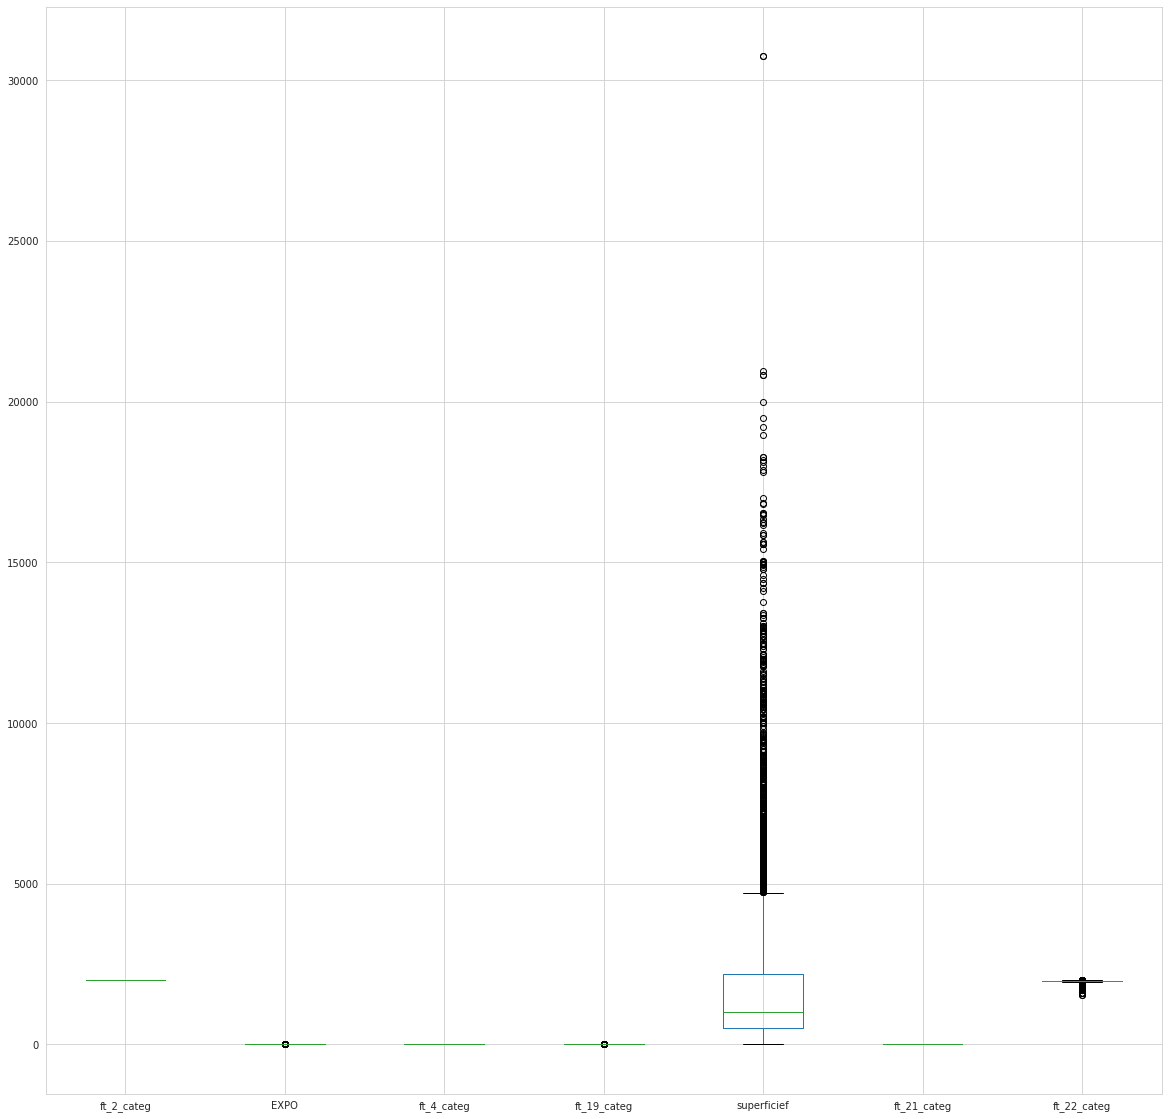

In [118]:
f, ax = plt.subplots(figsize=(20, 20))
train_data.boxplot(['ft_2_categ', 'EXPO', 'ft_4_categ','ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ'])
plt.show()

In [119]:
test_nan=(test_data.isnull().sum()/test_data.shape[0])*100
test_nan[['superficief','ft_22_categ','code_région']]

superficief     1.230950
ft_22_categ    11.781946
code_région          NaN
dtype: float64


### Statistical analysis of superficief attribute with value > 100 and < 15000

In [120]:
## superficief
train_data['superficief'].describe()

count    10110.000000
mean      1818.152918
std       2272.111284
min          1.000000
25%        500.000000
50%       1002.000000
75%       2190.000000
max      30745.000000
Name: superficief, dtype: float64

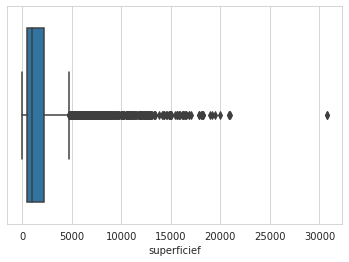

In [121]:
sns.boxplot(x=train_data['superficief'])

There are some outliers in superficief

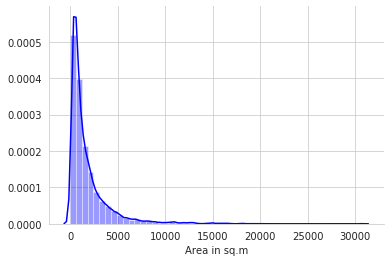

In [122]:
sns.distplot(train_data.superficief.dropna(),color='blue')
plt.xlabel('Area in sq.m')
sns.despine()

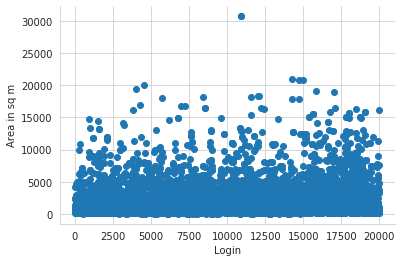

In [123]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['login']
y=train_data['superficief']
plt.xlabel('Login')
plt.ylabel('Area in sq m')
plt.scatter(x,y)
sns.despine()

The Maximum users has area between range of 100 to 15000

In [124]:
train_data[train_data.superficief>100]['superficief'].describe()

count    10021.000000
mean      1833.829358
std       2276.052092
min        104.000000
25%        518.000000
50%       1022.000000
75%       2200.000000
max      30745.000000
Name: superficief, dtype: float64

In [125]:
train_data[train_data.superficief<15000]['superficief'].describe()

count    10068.000000
mean      1752.146206
std       2021.729641
min          1.000000
25%        500.000000
50%       1000.000000
75%       2161.500000
max      14950.000000
Name: superficief, dtype: float64

In [126]:
train_data.loc[train_data.superficief>15000]=np.nan
train_data.loc[train_data.superficief<100]=np.nan
train_data.superficief.describe()

count    10005.000000
mean      1768.924138
std       2040.424244
min        100.000000
25%        510.000000
50%       1010.000000
75%       2184.000000
max      15000.000000
Name: superficief, dtype: float64

### Statistical analysis of ft_22_categ attribute with value > 1850 and < 2012

In [127]:
train_data.ft_22_categ.describe()

count    8910.000000
mean     1964.968350
std        33.640982
min      1545.000000
25%      1960.000000
50%      1969.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

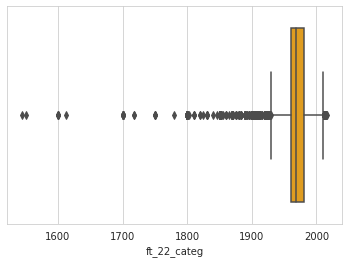

In [128]:
sns.boxplot(x=train_data['ft_22_categ'],color='orange')

boxplot shows that the ft_22_categ contain some outliers

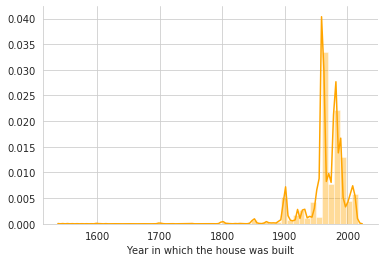

In [129]:
sns.distplot(train_data.ft_22_categ.dropna(),color='orange')
plt.xlabel('Year in which the house was built')
sns.despine()

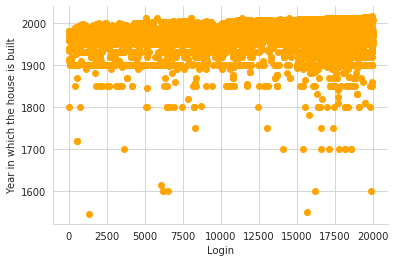

In [130]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['login']
y=train_data['ft_22_categ']
plt.xlabel('Login')
plt.ylabel('Year in which the house is built')
plt.scatter(x,y,color='orange')
sns.despine()

In [131]:
train_data[train_data.ft_22_categ>1850]['ft_22_categ'].describe()

count    8781.000000
mean     1967.354629
std        26.096286
min      1854.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

In [132]:
train_data[train_data.ft_22_categ<2012]['ft_22_categ'].describe()

count    8812.000000
mean     1964.438153
std        33.447434
min      1545.000000
25%      1960.000000
50%      1967.000000
75%      1980.000000
max      2011.000000
Name: ft_22_categ, dtype: float64

In [133]:
train_data.loc[train_data.ft_22_categ>2012]=np.nan
train_data.loc[train_data.ft_22_categ<1850]=np.nan
train_data.ft_22_categ.describe()

count    8808.000000
mean     1966.344005
std        27.681844
min      1850.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2012.000000
Name: ft_22_categ, dtype: float64

In [134]:
#train_data.code_région.describe()

AttributeError: 'DataFrame' object has no attribute 'code_région'

In [ ]:
#sns.boxplot(x=train_data['code_région'],color='red')

In [ ]:
#sns.distplot(train_data.code_région.dropna(),color='red')
#plt.xlabel('Region x')
#sns.despine()

### Data Visualization

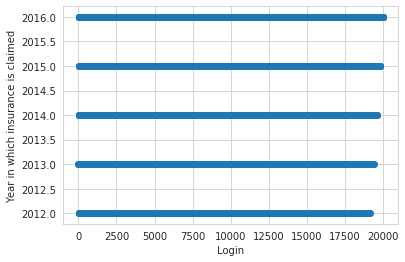

In [135]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['login']
y=train_data['ft_2_categ']
plt.xlabel('Login')
plt.ylabel('Year in which insurance is claimed')
plt.scatter(x,y)

There no missing data and outliers in the ft_2_categ 

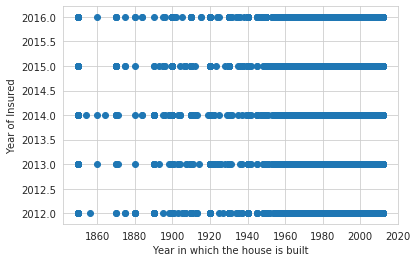

In [136]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
y=train_data['ft_2_categ']
x=train_data['ft_22_categ']
plt.xlabel('Year in which the house is built')
plt.ylabel('Year of Insured')
plt.scatter(x,y)


 from graph we infer that All house in our train Dataset has Claimed insurace between 2012-2016

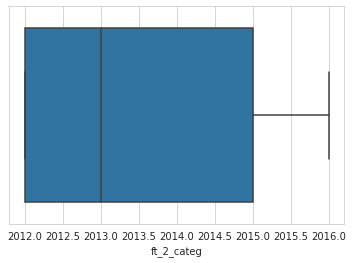

In [137]:
sns.boxplot(x=train_data['ft_2_categ'])

There is no outliers in ft_2_categ

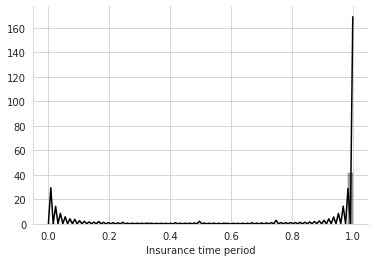

In [138]:
sns.distplot(train_data.EXPO.dropna(),color='black')
plt.xlabel('Insurance time period')
sns.despine()

Maximum number of users has claimed their insurance in the period of 1 year

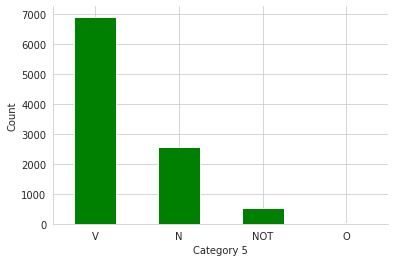

In [139]:
train_data.ft_5_categ.value_counts(dropna=True).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 5')
plt.ylabel('Count')
sns.despine()

ft_5_categ has the highest frequency of V

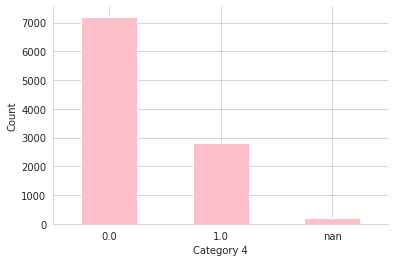

In [140]:
train_data.ft_4_categ.value_counts(dropna=False).plot(kind='bar',color='pink',rot=0)
plt.xlabel('Category 4')
plt.ylabel('Count')
sns.despine()

ft_4_categ has the highest frequency of class 0

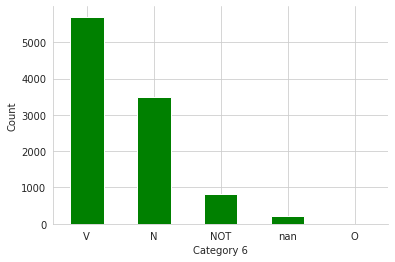

In [141]:
train_data.ft_6_categ.value_counts(dropna=False).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 6')
plt.ylabel('Count')
sns.despine()

ft_6_categ is a categorical feature with the highest frequency of class V

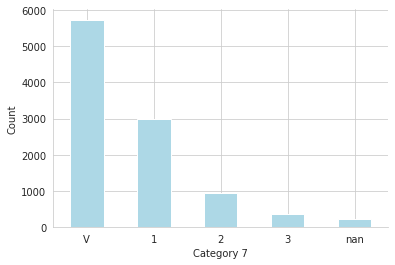

In [142]:
train_data.ft_7_categ.value_counts(dropna=False).plot(kind='bar',color='lightblue',rot=0)
plt.xlabel('Category 7')
plt.ylabel('Count')
sns.despine()

ft_7_categ is a categorical feature with the highest frequency of class V

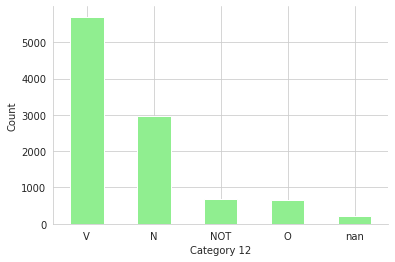

In [143]:
train_data.ft_12_categ.value_counts(dropna=False).plot(kind='bar',color='lightgreen',rot=0)
plt.xlabel('Category 12')
plt.ylabel('Count')
sns.despine()


ft_12_categ is a categorical feature with the highest frequency of class V

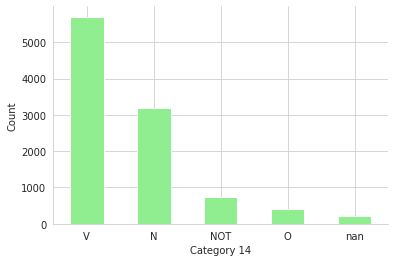

In [144]:
train_data.ft_14_categ.value_counts(dropna=False).plot(kind='bar',color='lightgreen',rot=0)
plt.xlabel('Category 14')
plt.ylabel('Count')
sns.despine()

ft_14_categ is a categorical feature with the highest frequency of class V

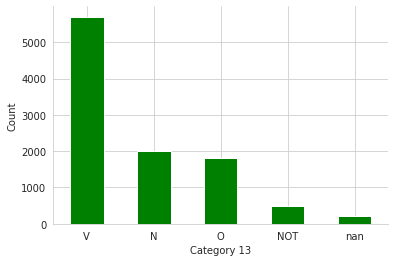

In [145]:
train_data.ft_13_categ.value_counts(dropna=False).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 13')
plt.ylabel('Count')
sns.despine()


ft_13_categ is a categorical feature with the highest frequency of class V

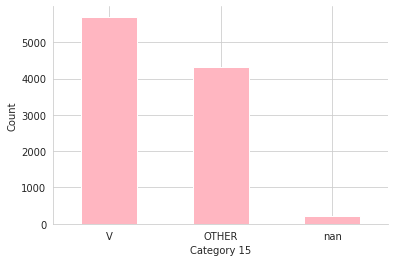

In [146]:
train_data.ft_15_categ.replace('AUTRE','OTHER',inplace=True)
train_data.ft_15_categ
train_data.ft_15_categ.value_counts(dropna=False).plot(kind='bar',color='lightpink',rot=0)
plt.xlabel('Category 15')
plt.ylabel('Count')
sns.despine()
plt.show()

ft_15_categ is a categorical feature with the highest frequency of class V

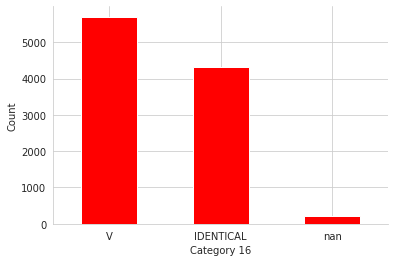

In [147]:
train_data.ft_16_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_16_categ.value_counts(dropna=False).plot(kind='bar',color='red',rot=0)
plt.xlabel('Category 16')
plt.ylabel('Count')
sns.despine()

ft_16_categ is a categorical feature with the highest frequency of class V

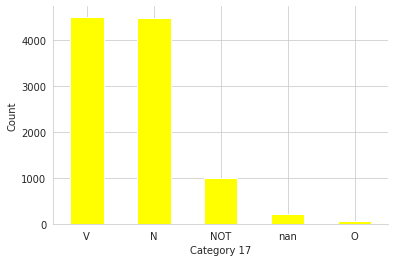

In [148]:
train_data.ft_17_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_17_categ.value_counts(dropna=False).plot(kind='bar',color='yellow',rot=0)
plt.xlabel('Category 17')
plt.ylabel('Count')
sns.despine()

ft_17_categ is a categorical feature with the highest frequency of class NOT

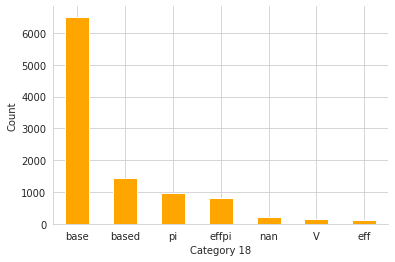

In [149]:
train_data.ft_18_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_18_categ.value_counts(dropna=False).plot(kind='bar',color='orange',rot=0)
plt.xlabel('Category 18')
plt.ylabel('Count')
sns.despine()

ft_18_categ is a categorical feature with the highest frequency of class base

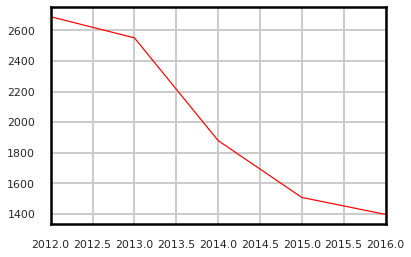

In [150]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=0.5)
train_data.ft_2_categ.value_counts().plot(kind='line', linewidth=1.2, color='red')


From the above line graph, we infer that the number of houses insured has a drastic decrease from 2012 to 2016

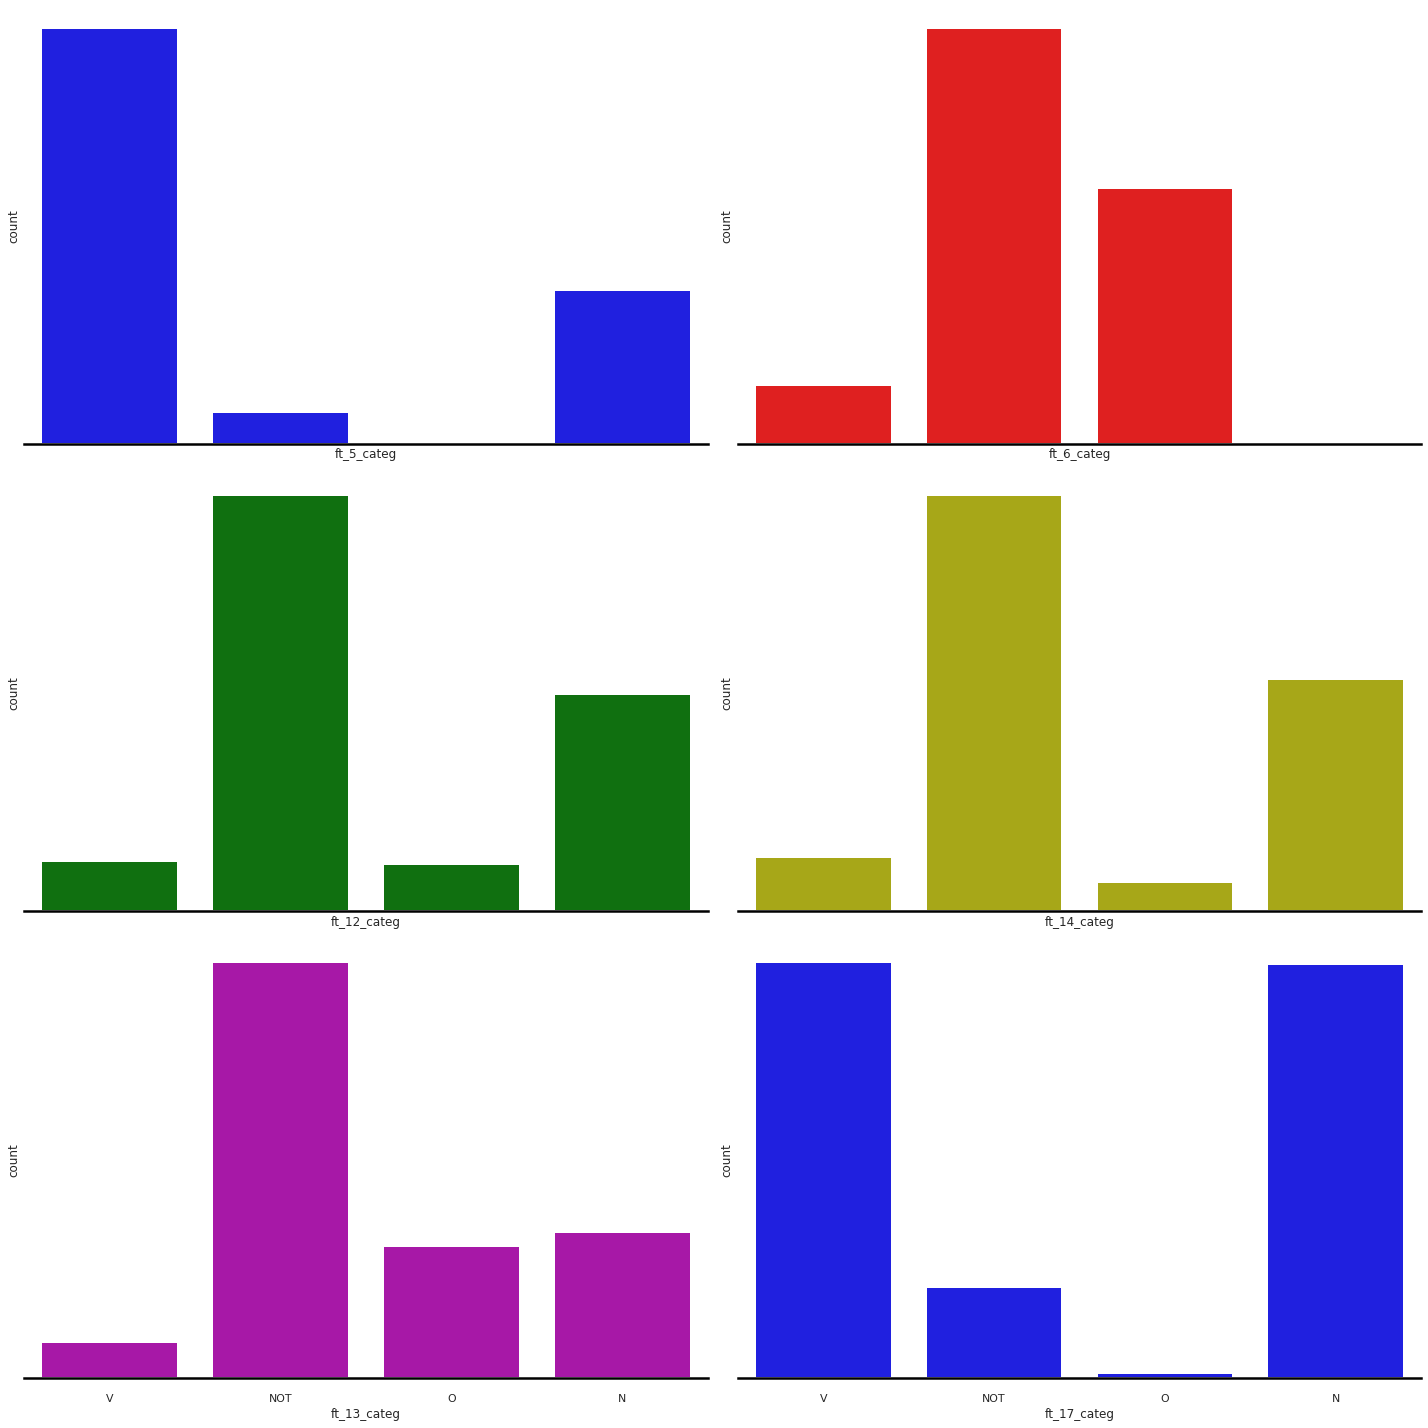

In [151]:
f,a=plt.subplots(3,2,figsize=(20,20),sharex=True)
sns.despine(left=True)
sns.countplot(x="ft_5_categ",data=train_data,color="b",ax=a[0,0])
sns.countplot(x="ft_6_categ",data=train_data,color="r",ax=a[0,1])
sns.countplot(x="ft_12_categ",data=train_data,color="g",ax=a[1,0])
sns.countplot(x="ft_14_categ",data=train_data,color="y",ax=a[1,1])
sns.countplot(x="ft_13_categ",data=train_data,color="m",ax=a[2,0])
sns.countplot(x="ft_17_categ",data=train_data,color="b",ax=a[2,1])
plt.setp(a,yticks=[])
plt.tight_layout()

This is a comparative study of the features having the same classes namely V,NOT,O

In [153]:
#train_data.code_région.value_counts(dropna=False).plot(kind='bar',color='red',rot=90)
#plt.xlabel('Region')
#plt.ylabel('Count')
#sns.despine()

In [ ]:
"""sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['code_région']
y=train_data['superficief']
plt.xlabel('Region codes')
plt.ylabel('Area of the house')
plt.scatter(x,y)
"""

In [154]:
"""sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['code_région']
y=train_data['ft_22_categ']
plt.xlabel('Region codes')
plt.ylabel('Year in which the house was built')
plt.scatter(x,y)
"""

"sns.set_style('whitegrid',{'access.edgecolor':'0'})\nx=train_data['code_région']\ny=train_data['ft_22_categ']\nplt.xlabel('Region codes')\nplt.ylabel('Year in which the house was built')\nplt.scatter(x,y)\n"

In [ ]:
"""target0 = sum(train_data['target'] == 0)
target1 = sum(train_data['target'] == 1)

target0_region = train_data.loc[train_data['target'] == 0, 'code_région'].value_counts() / target0 * 100
target1_region = train_data.loc[train_data['target'] == 1, 'code_région'].value_counts() / target1 * 100
width = 0.4
target0_region.plot(kind='bar',width=0.4,color='skyblue',rot=0,position=0,label='0')
target1_region.plot(kind='bar',width=0.4,color='blue',rot=270,position=1,label='1')
plt.legend()
plt.xlabel('Region')
plt.ylabel('Percentage')
sns.despine()
plt.show()"""

In [ ]:
target0 = sum(train_data['target'] == 0)
target1 = sum(train_data['target'] == 1)

target0_region = train_data.loc[train_data['target'] == 0, 'ft_5_categ'].value_counts() / target0 * 100
target1_region = train_data.loc[train_data['target'] == 1, 'ft_5_categ'].value_counts() / target1 * 100
width = 0.4
target0_region.plot(kind='bar',width=0.4,color='orange',rot=0,position=0,label='0')
target1_region.plot(kind='bar',width=0.4,color='red',rot=270,position=1,label='1')
plt.legend()
plt.xlabel('Feature 5')
plt.ylabel('Percentage')
sns.despine()
plt.show()

In [ ]:
target0 = sum(train_data['target'] == 0)
target1 = sum(train_data['target'] == 1)

target0_region = train_data.loc[train_data['target'] == 0, 'ft_6_categ'].value_counts() / target0 * 100
target1_region = train_data.loc[train_data['target'] == 1, 'ft_6_categ'].value_counts() / target1 * 100
width = 0.4
target0_region.plot(kind='bar',width=0.4,color='orange',rot=0,position=0,label='0')
target1_region.plot(kind='bar',width=0.4,color='red',rot=270,position=1,label='1')
plt.legend()
plt.xlabel('Feature 6')
plt.ylabel('Percentage')
sns.despine()
plt.show()

In [ ]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['code_région']
y=train_data['EXPO']
plt.xlabel('Region codes')
plt.ylabel('Time insured')
plt.scatter(x,y)


In [ ]:
test_login=test_data['Identifiant']
test_login.head()

Storing the login attribute which is further used during the final output creation

In [ ]:
train_data['target']=targ

### Removing attribute login as it does not support in the prediction

In [ ]:
train_data.drop('Identifiant',axis=1,inplace=True)
test_data.drop('Identifiant',axis=1,inplace=True)
train_data.head()

In [ ]:
test_data.head()

In [ ]:
nan_data1=train_data.isnull().sum()
nan_data1

# Data Preprocessing

### Data Cleaning

### Filling in Missing values

In [ ]:
train_data['superficief']=train_data['superficief'].interpolate(method='linear',limit_direction='forward')

In [ ]:
#train_data['code_région']=train_data['code_région'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_22_categ']=train_data['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [ ]:
train_data['ft_24_categ']=train_data.ft_24_categ.replace('> = 10',10)
train_data['ft_24_categ']=train_data.ft_24_categ.replace('>=10',10)
train_data['ft_24_categ']=train_data['ft_24_categ'].astype('float')
train_data['ft_24_categ']=train_data['ft_24_categ'].interpolate(method='linear',limit_direction='forward')

In [ ]:
train_data['ft_2_categ']=train_data['ft_2_categ'].interpolate(method='linear',limit_direction='forward')

In [ ]:
train_data['EXPO']=train_data['EXPO'].interpolate(method='linear',limit_direction='forward')

In [ ]:
train_data['ft_4_categ']=train_data['ft_4_categ'].interpolate(method='linear',limit_direction='forward')

In [ ]:
train_data['ft_21_categ']=train_data['ft_21_categ'].interpolate(method='linear',limit_direction='forward')

In [ ]:
train_data.describe().transpose()

In [ ]:
train_data['ft_5_categ']=train_data['ft_5_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_6_categ']=train_data['ft_6_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_7_categ']=train_data['ft_7_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_8_categ']=train_data['ft_8_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_9_categ']=train_data['ft_9_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_10_categ']=train_data['ft_10_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_11_categ']=train_data['ft_11_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_12_categ']=train_data['ft_12_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_13_categ']=train_data['ft_13_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_14_categ']=train_data['ft_14_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_15_categ']=train_data['ft_15_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_16_categ']=train_data['ft_16_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_17_categ']=train_data['ft_17_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_18_categ']=train_data['ft_18_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_19_categ']=train_data['ft_19_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data['ft_23_categ']=train_data['ft_23_categ'].fillna(method='bfill').fillna(0)

In [ ]:
train_data.describe().transpose()

### Finding correlation between attributes

In [ ]:
train=train_data
train.drop('target',axis=1,inplace=True)

In [ ]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,vmin=-1,vmax=1)

In [ ]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

From the heat maps and correlation matrix it is visible that none of the features are positively or negatively 
correlated with each other

### Data Transformation

### Label Encoding Categorical Attributes

In [ ]:
from pandas.api.types import CategoricalDtype
def convert_Encoding(df,col):
    df[col],_ =pd.factorize(df[col])
    return df

print("Encoding categorical data...")
columns_to_convert = [ 'ft_5_categ','ft_6_categ', 'ft_7_categ','ft_8_categ','ft_9_categ', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ','ft_15_categ','ft_16_categ','ft_17_categ','ft_18_categ','ft_23_categ']

for column in columns_to_convert:
    train_data= convert_Encoding(df=train_data,col=column)
print("Encoding complete...")

In [ ]:
train_data.head()

In [ ]:
train_data['target']=targ
train_data.columns

In [ ]:
train_data.describe().transpose()

### Data Normalization

In [ ]:
sns.distplot(train['ft_7_categ'])

In [ ]:
train_data.ft_7_categ=minmax_scaling(train_data['ft_7_categ'],columns=0)
sns.distplot(train_data['ft_7_categ'])

In [ ]:
sns.distplot(train['ft_9_categ'])

In [ ]:
train_data.ft_9_categ=minmax_scaling(train_data['ft_9_categ'],columns=0)
sns.distplot(train['ft_9_categ'])

In [ ]:
sns.distplot(train['ft_23_categ'])

In [ ]:
train_data.ft_23_categ=minmax_scaling(train_data['ft_23_categ'],columns=0)
sns.distplot(train['ft_23_categ'])

In [ ]:
sns.distplot(train['ft_5_categ'])

In [ ]:
train_data.ft_5_categ=minmax_scaling(train_data['ft_5_categ'],columns=0)
sns.distplot(train['ft_5_categ'])

In [ ]:
sns.distplot(train['ft_6_categ'])

In [ ]:
train_data.ft_6_categ=minmax_scaling(train_data['ft_6_categ'],columns=0)
sns.distplot(train['ft_6_categ'])

In [ ]:
sns.distplot(train['ft_8_categ'])

In [ ]:
train_data.ft_8_categ=minmax_scaling(train_data['ft_8_categ'],columns=0)
sns.distplot(train['ft_8_categ'])

In [ ]:
sns.distplot(train['ft_10_categ'])

In [ ]:
train_data.ft_10_categ=minmax_scaling(train_data['ft_10_categ'],columns=0)
sns.distplot(train['ft_10_categ'])

In [ ]:
sns.distplot(train['ft_11_categ'])

In [ ]:
train_data.ft_11_categ=minmax_scaling(train_data['ft_11_categ'],columns=0)
sns.distplot(train['ft_11_categ'])

In [ ]:
sns.distplot(train['ft_12_categ'])

In [ ]:
train_data.ft_12_categ=minmax_scaling(train_data['ft_12_categ'],columns=0)
sns.distplot(train['ft_12_categ'])

In [ ]:
sns.distplot(train['ft_13_categ'])

In [ ]:
train_data.ft_13_categ=minmax_scaling(train_data['ft_13_categ'],columns=0)
sns.distplot(train['ft_13_categ'])

In [ ]:
sns.distplot(train['ft_14_categ'])

In [ ]:
train_data.ft_14_categ=minmax_scaling(train_data['ft_14_categ'],columns=0)
sns.distplot(train['ft_14_categ'])

In [ ]:
sns.distplot(train['ft_15_categ'])

In [ ]:
train_data.ft_15_categ=minmax_scaling(train_data['ft_15_categ'],columns=0)
sns.distplot(train['ft_15_categ'])

In [ ]:
sns.distplot(train['ft_16_categ'])

In [ ]:
train_data.ft_16_categ=minmax_scaling(train_data['ft_16_categ'],columns=0)
sns.distplot(train['ft_16_categ'])

In [ ]:
sns.distplot(train['ft_17_categ'])

In [ ]:
train_data.ft_17_categ=minmax_scaling(train_data['ft_17_categ'],columns=0)
sns.distplot(train['ft_17_categ'])

In [ ]:
sns.distplot(train['ft_18_categ'])

In [ ]:
train_data.ft_18_categ=minmax_scaling(train_data['ft_18_categ'],columns=0)
sns.distplot(train['ft_18_categ'])

In [ ]:
sns.distplot(train['ft_19_categ'])

In [ ]:
train_data.ft_19_categ=minmax_scaling(train_data['ft_19_categ'],columns=0)
sns.distplot(train['ft_19_categ'])

In [ ]:
sns.distplot(train['ft_21_categ'])

In [ ]:
train_data.ft_21_categ=minmax_scaling(train_data['ft_21_categ'],columns=0)
sns.distplot(train['ft_21_categ'])

In [ ]:
sns.distplot(train['ft_24_categ'])

In [ ]:
train_data.ft_24_categ=minmax_scaling(train_data['ft_24_categ'],columns=0)
sns.distplot(train['ft_24_categ'])

In [ ]:
sns.distplot(train['superficief'])

In [ ]:
train_data['superficief']=minmax_scaling(train_data['superficief'],columns=0)
sns.distplot(train['superficief'])

In [ ]:
train_data.describe().transpose()

In [ ]:
train_data.shape[0]

In [ ]:
train_data.columns

### Test Dataset

In [ ]:
test_data.loc[test_data.superficief>15000]=np.nan
test_data.loc[test_data.superficief<100]=np.nan

In [ ]:
test_data.loc[test_data.ft_22_categ>2012]=np.nan
test_data.loc[test_data.ft_22_categ<1850]=np.nan

In [ ]:
nan_data2=test_data.isnull().sum()
nan_data2

### Filling the missing values

In [ ]:
test_data['superficief']=test_data['superficief'].interpolate(method='linear',limit_direction='forward')

In [ ]:
test_data['ft_22_categ']=test_data['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [ ]:
test_data['ft_23_categ']=test_data['ft_23_categ'].interpolate(method='linear',limit_direction='forward')

In [ ]:
test_data['ft_24_categ']=test_data.ft_24_categ.replace('> = 10',10)
test_data['ft_24_categ']=test_data.ft_24_categ.replace('>=10',10)
test_data['ft_24_categ']=test_data['ft_24_categ'].astype('float')
test_data['ft_24_categ']=test_data['ft_24_categ'].interpolate(method='linear',limit_direction='forward')

In [ ]:
test_data['ft_21_categ']=test_data['ft_21_categ'].interpolate(method='linear',limit_direction='forward')

In [ ]:
test_data['ft_19_categ']=test_data['ft_19_categ'].interpolate(method='linear',limit_direction='forward')

In [ ]:
test_data['EXPO']=test_data['EXPO'].interpolate(method='linear',limit_direction='forward')

In [ ]:
test_data['code_région']=test_data['code_région'].fillna(method='bfill').fillna(0)

In [ ]:
test_data['ft_2_categ']=test_data['ft_2_categ'].interpolate(method='linear',limit_direction='forward')

In [ ]:
test_data['ft_4_categ']=test_data['ft_4_categ'].interpolate(method='linear',limit_direction='forward')

In [ ]:
test_data['ft_5_categ']=test_data['ft_5_categ'].fillna(method='bfill').fillna(0)
test_data['ft_6_categ']=test_data['ft_6_categ'].fillna(method='bfill').fillna(0)
test_data['ft_7_categ']=test_data['ft_7_categ'].fillna(method='bfill').fillna(0)
test_data['ft_8_categ']=test_data['ft_8_categ'].fillna(method='bfill').fillna(0)
test_data['ft_9_categ']=test_data['ft_9_categ'].fillna(method='bfill').fillna(0)
test_data['ft_10_categ']=test_data['ft_10_categ'].fillna(method='bfill').fillna(0)
test_data['ft_11_categ']=test_data['ft_11_categ'].fillna(method='bfill').fillna(0)
test_data['ft_12_categ']=test_data['ft_12_categ'].fillna(method='bfill').fillna(0)
test_data['ft_13_categ']=test_data['ft_13_categ'].fillna(method='bfill').fillna(0)
test_data['ft_14_categ']=test_data['ft_14_categ'].fillna(method='bfill').fillna(0)
test_data['ft_15_categ']=test_data['ft_15_categ'].fillna(method='bfill').fillna(0)
test_data['ft_16_categ']=test_data['ft_16_categ'].fillna(method='bfill').fillna(0)
test_data['ft_17_categ']=test_data['ft_17_categ'].fillna(method='bfill').fillna(0)
test_data['ft_18_categ']=test_data['ft_18_categ'].fillna(method='bfill').fillna(0)
test_data['ft_23_categ']=test_data['ft_23_categ'].fillna(method='bfill').fillna(0)

### Label Encoding For Categorical Attributes

In [ ]:
from pandas.api.types import CategoricalDtype
def convert_Encoding(df,col):
    df[col],_ =pd.factorize(df[col])
    return df

print("Encoding categorical data...")
columns_to_convert = [ 'ft_5_categ','ft_6_categ', 'ft_7_categ','ft_8_categ','ft_9_categ', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ','ft_15_categ','ft_16_categ','ft_17_categ','ft_18_categ','ft_23_categ']

for column in columns_to_convert:
    test_data= convert_Encoding(df=test_data,col=column)
print("Encoding complete...")

### Data Normalization

In [ ]:
test_data.ft_4_categ=minmax_scaling(test_data['ft_4_categ'],columns=0)

In [ ]:
test_data['superficief']=minmax_scaling(test_data['superficief'],columns=0)

In [ ]:
test_data.ft_7_categ=minmax_scaling(test_data['ft_7_categ'],columns=0)

In [ ]:
test_data.ft_9_categ=minmax_scaling(test_data['ft_9_categ'],columns=0)

In [ ]:
test_data.ft_23_categ=minmax_scaling(test_data['ft_23_categ'],columns=0)

In [ ]:
test_data.ft_5_categ=minmax_scaling(test_data['ft_5_categ'],columns=0)
test_data.ft_6_categ=minmax_scaling(test_data['ft_6_categ'],columns=0)
test_data.ft_8_categ=minmax_scaling(test_data['ft_8_categ'],columns=0)
test_data.ft_10_categ=minmax_scaling(test_data['ft_10_categ'],columns=0)
test_data.ft_11_categ=minmax_scaling(test_data['ft_11_categ'],columns=0)
test_data.ft_12_categ=minmax_scaling(test_data['ft_12_categ'],columns=0)
test_data.ft_13_categ=minmax_scaling(test_data['ft_13_categ'],columns=0)
test_data.ft_14_categ=minmax_scaling(test_data['ft_14_categ'],columns=0)
test_data.ft_15_categ=minmax_scaling(test_data['ft_15_categ'],columns=0)
test_data.ft_16_categ=minmax_scaling(test_data['ft_16_categ'],columns=0)
test_data.ft_17_categ=minmax_scaling(test_data['ft_17_categ'],columns=0)
test_data.ft_18_categ=minmax_scaling(test_data['ft_18_categ'],columns=0)
test_data.ft_19_categ=minmax_scaling(test_data['ft_19_categ'],columns=0)
test_data.ft_21_categ=minmax_scaling(test_data['ft_21_categ'],columns=0)

In [ ]:
test_data.describe().transpose()

In [ ]:
test_data.columns

In [ ]:
test_data.head()

In [ ]:
test_data.shape[0]

### Feature Selection

In [ ]:
plt.figure(figsize=(50,25))
cor = train_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

From the heatmap, it is visible that none of the attributes are correlated with the target variable

In [ ]:
target=train_data['target']
train=train_data
train.drop('target',axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(train, target)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(train,target))
coef = pd.Series(reg.coef_, index = train.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = coef.sort_values()
print(imp_coef)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "bar")
plt.title("Feature importance using Lasso Model")

In [ ]:
train1=train_data[['ft_18_categ','ft_2_categ','ft_13_categ','ft_7_categ','ft_15_categ','ft_19_categ','ft_24_categ','ft_21_categ','EXPO','superficief']]
train1.head()

### Model Implementation

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
X=train_data.iloc[:,:]
Y=train_datay.iloc[:,-1]

In [ ]:
#params={'objective':'binary:logistic','max_depth':6,'learning_rate':0.05,'n_estimators':200,}
#model1=XGBClassifier(**params).fit(X,Y)
model2 = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.05,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=200, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
model2.fit(X,Y)
y_preds=model2.predict(test_data)
print(y_preds)

In [ ]:
#test_login=test_login.tolist()
test_login=np.array(test_login)
test_login.shape

In [ ]:
df=pd.DataFrame({'login':test_login})
df['TARGET']=y_preds
print(df)

In [ ]:
export_csv=df.to_csv(r'/home/ubuntu/Desktop/DMA Project/y_test.csv',index=None,header=True)

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(train1, target, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xTrain,yTrain)
y_pred=lr.predict(xTest)

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
accuracy=accuracy_score(yTest,y_pred)
print('Accuracy: %f' %accuracy)
precision=precision_score(yTest,y_pred)
print('Precision: %f' %precision)
recall=recall_score(yTest,y_pred)
print('Recall :%f' %recall)
f1=f1_score(yTest,y_pred)
print('F1 Score :%f' %f1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train,target)
y_pred=lr.predict(test_data)

In [ ]:
y_pred

In [ ]:
df=pd.DataFrame({'Identifiant':test_login})
df['target']=y_pred
df

In [ ]:
export_csv=df.to_csv(r'/home/ubuntu/Desktop/DMA Project/dataset/y_test.csv',index=True,header=True)

In [ ]:
y_test=pd.merge(test_data1,df,how='outer',on='Identifiant')
y_test.drop('Index',axis=1,inplace=True)
y_test.head()

In [ ]:
export_csv=y_test.to_csv(r'/home/ubuntu/Desktop/DMA Project/dataset/Y_test.csv',index=True,header=True)

### References

https://www.datacamp.com/community/tutorials/xgboost-in-python

https://www.quora.com/What-kind-of-test-should-I-use-to-test-the-correlation-between-categorical-and-numeric-variables

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://heartbeat.fritz.ai/boosting-your-machine-learning-models-using-xgboost-d2cabb3e948f

https://hackernoon.com/data-cleaning-3c3e37f358dc

https://www.stackabuse.com/applying-wrapper-methods-in-python-for-feature-selection/

https://hackernoon.com/what-steps-should-one-take-while-doing-data-preprocessing-502c993e1caa

https://hub.packtpub.com/4-ways-implement-feature-selection-python-machine-learning/

https://www.datacamp.com/community/tutorials/feature-selection-python